100%|██████████| 501/501 [00:02<00:00, 193.99it/s]


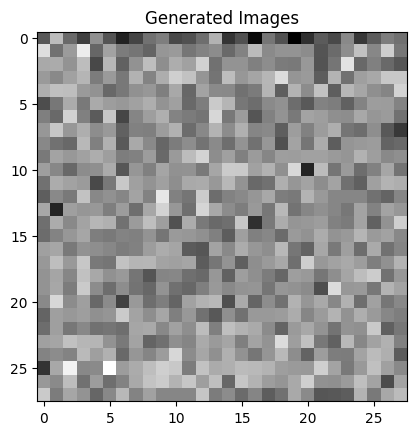

In [17]:
"""
Marcelo Gennari do Nascimento, 2022
marcelogennari@outlook.com

This script performs the sampling given the trained UNet model
"""
from tqdm import trange

import torch
from models import ConditionalUNet, UNet
from diffusion_model import DiffusionProcess

import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Prepare model
    device = "cuda"
    batch_size = 1
    model = UNet().to(device)
    model.load_state_dict(torch.load("Model_sole_DDPM.pth"))
    process = DiffusionProcess()

    # Sampling
    xt = torch.randn(batch_size, 1, 28, 28)
    digit_to_sample = torch.Tensor([9]).to(dtype=torch.long).to(device)

    model.eval()
    with torch.no_grad():
        for t in trange(500, -1, -1):
            time = torch.ones(batch_size) * t
            et = model(xt.to(device), time.to(device))  # predict noise
            xt = process.inverse(xt, et.cpu(), t)

    labels = ["Generated Images"] * 9

    for i in range(1):
        plt.tight_layout()
        plt.imshow(xt[i][0], cmap="gray", interpolation="none")
        plt.title(labels[i])
    plt.show()


In [18]:
from skimage.metrics import peak_signal_noise_ratio
from torchvision import datasets ,transforms
transform = transforms.Compose([
    transforms.ToTensor()
])
image , _ = datasets.MNIST(root='./data', train=True, download=True, transform=transform)[15]
image = image.reshape((1,1,28,28))
clean_image_np = image.squeeze().cpu().numpy()
refined_img_np = xt.squeeze().cpu().numpy()
print(image.shape)
print(xt.shape)
psnr_value = peak_signal_noise_ratio(clean_image_np, refined_img_np)
psnr_value

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


1.2302671435454218